In [ ]:
!pip install --upgrade scikit-learn==1.0.2
!pip install --upgrade numpy==1.21.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 1.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
!wget https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/hed2020_dataset.csv

--2022-09-15 09:12:40--  https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/hed2020_dataset.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kaopanboonyuen/Python-Data-Science/master/Dataset/hed2020_dataset.csv [following]
--2022-09-15 09:12:40--  https://raw.githubusercontent.com/kaopanboonyuen/Python-Data-Science/master/Dataset/hed2020_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 352588 (344K) [text/plain]
Saving to: ‘hed2020_dataset.csv’

hed2020_dataset.csv 100%[===================>] 344.32K  --.-KB/s    in 0.03s   

2022-09-15 09:12:40 (10.1 MB/s) - ‘

In [ ]:
df = pd.read_csv('hed2020_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5824 non-null   int64  
 1   label                        5764 non-null   object 
 2   cap-shape                    5824 non-null   object 
 3   cap-surface                  5797 non-null   object 
 4   bruises                      5725 non-null   object 
 5   odor                         5725 non-null   object 
 6   gill-attachment              5725 non-null   object 
 7   gill-spacing                 5694 non-null   object 
 8   gill-size                    5703 non-null   object 
 9   stalk-shape                  5703 non-null   object 
 10  stalk-root                   5793 non-null   object 
 11  stalk-surface-above-ring     5793 non-null   object 
 12  stalk-surface-below-ring     5793 non-null   object 
 13  veil-type         

In [ ]:
df.head()

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
0,1,p,x,s,t,p,f,c,n,e,...,o,p,k,s,u,1.0,3.0,1.0,1.0,1.0
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
3,4,p,x,y,t,p,f,c,n,e,...,o,p,k,s,u,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0


In [ ]:
df = df[df['label']=='e']

In [ ]:
df.isna().sum()

id                              0
label                           0
cap-shape                       0
cap-surface                     6
bruises                        27
odor                           27
gill-attachment                27
gill-spacing                   55
gill-size                      49
stalk-shape                    49
stalk-root                     28
stalk-surface-above-ring       28
stalk-surface-below-ring       28
veil-type                      34
ring-number                    34
ring-type                      34
spore-print-color              32
population                     32
habitat                        28
cap-color-rate                  6
gill-color-rate                49
veil-color-rate                34
stalk-color-above-ring-rate    28
stalk-color-below-ring-rate    34
dtype: int64

In [ ]:
df['cap-color-rate'].fillna(df['cap-color-rate'].mean(),inplace=True)

In [ ]:
df['stalk-color-above-ring-rate'].fillna(df['stalk-color-above-ring-rate'].mean(),inplace=True)

In [ ]:
print(df['cap-color-rate'].isna().sum())
print(df['stalk-color-above-ring-rate'].isna().sum())

0
0


In [ ]:
print(df['cap-color-rate'].value_counts())
print(df['stalk-color-above-ring-rate'].value_counts())

1.000000     669
4.000000     583
5.000000     506
3.000000     170
6.000000      54
7.000000      46
9.000000      32
8.000000      16
10.000000     16
2.000000       6
3.467588       6
Name: cap-color-rate, dtype: int64
1.000000    949
2.000000    414
3.000000    409
7.000000    192
6.000000     96
2.410405     28
5.000000     16
Name: stalk-color-above-ring-rate, dtype: int64


In [ ]:
print(df['cap-color-rate'].describe())
print(df['stalk-color-above-ring-rate'].describe())

count    2104.000000
mean        3.466255
std         1.997336
min         1.000000
25%         1.000000
50%         4.000000
75%         5.000000
max        10.000000
Name: cap-color-rate, dtype: float64
count    2104.000000
mean        2.404943
std         1.887591
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: stalk-color-above-ring-rate, dtype: float64


In [ ]:
data = df[['cap-color-rate','stalk-color-above-ring-rate']].to_numpy()

In [ ]:
data

array([[2., 1.],
       [3., 1.],
       [4., 1.],
       ...,
       [1., 7.],
       [1., 7.],
       [1., 7.]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
trans_data = scaler.transform(data)

In [ ]:
org_data = scaler.inverse_transform(trans_data)

In [ ]:
print(trans_data[:5])
print(org_data[:5])

[[-0.73427978 -0.7444817 ]
 [-0.23349383 -0.7444817 ]
 [ 0.26729212 -0.7444817 ]
 [-0.73427978 -0.7444817 ]
 [-0.23349383 -0.7444817 ]]
[[2. 1.]
 [3. 1.]
 [4. 1.]
 [2. 1.]
 [3. 1.]]


In [ ]:
len(trans_data)

2104

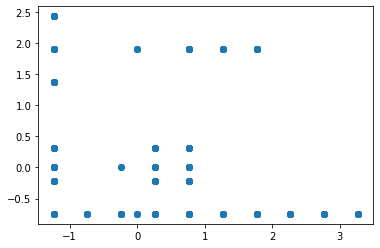

In [ ]:
plt.scatter(trans_data[:,0],trans_data[:,1],cmap='rainbow')

In [ ]:
kmeans = KMeans(n_clusters=5,random_state=2020)

In [ ]:
kmeans.fit(trans_data)

KMeans(n_clusters=5, random_state=2020)

In [ ]:
print(kmeans.cluster_centers_)

[[ 0.41361805 -0.37536859]
 [-1.23582983  2.30658376]
 [-1.22906193 -0.29354739]
 [ 2.5059661  -0.74760802]
 [ 1.2093128   1.90272369]]


In [ ]:
trans_data[:,0].max()

3.2715951093044

In [ ]:
trans_data[:,1].min()

-0.7476080188414364

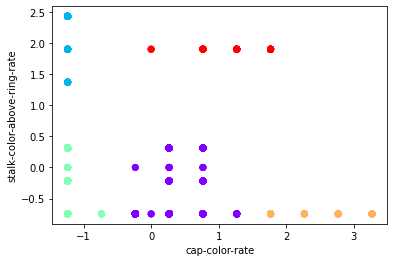

In [ ]:
plt.scatter(trans_data[:,0],trans_data[:,1],c=kmeans.labels_,cmap='rainbow')
plt.xlabel("cap-color-rate")
plt.ylabel("stalk-color-above-ring-rate")
plt.show()

In [ ]:
# แบ่งออกเป็นห้ากลุ่ม 
# กลุ่มที่ 1 มี centroid ที่ตำแหน่ง (0.413,-0.375) จากกราฟคือกลุ่มสีม่วง มีข้อมูลอยู่ในแกน X ช่วงประมาณ -0.3 ถึง 1.3 มีข้อมูลอยู่ในแกน y ช่วงประมาณ -0.7 ถึง 0.4
# กลุ่มที่ 2 มี centroid ที่ตำแหน่ง (-1.235,2.306) จากกราฟคือกลุ่มสีฟ้า มีข้อมูลอยู่ในแกน X ช่วงประมาณ -1.2 ถึง -1 มีข้อมูลอยู่ในแกน y ช่วงประมาณ 1.4 ถึง 2.5
# กลุ่มที่ 3 มี centroid ที่ตำแหน่ง (-1.229,-0.293) จากกราฟคือกลุ่มสีเขียว มีข้อมูลอยู่ในแกน X ช่วงประมาณ -1.2 มีข้อมูลอยู่ในแกน y ช่วงประมาณ -0.7 ถึง 0.4
# กลุ่มที่ 4 มี centroid ที่ตำแหน่ง (2.505,-0.747) จากกราฟคือกลุ่มสีเหลือง มีข้อมูลอยู่ในแกน X ช่วงประมาณ 1.8 ถึง 3.28 มีข้อมูลอยู่ในแกน y ช่วงประมาณ -0.7 
# กลุ่มที่ 5 มี centroid ที่ตำแหน่ง 1.209,1.902) จากกราฟคือกลุ่มสีแดง มีข้อมูลอยู่ในแกน X ช่วงประมาณ 0 ถึง 2 มีข้อมูลอยู่ในแกน y ช่วงประมาณ 1.9